In [1]:
from sdv import load_demo

In [2]:
metadata, tables = load_demo(metadata=True)

In [3]:
metadata.to_dict()

{'tables': {'users': {'primary_key': 'user_id',
   'fields': {'user_id': {'type': 'id', 'subtype': 'integer'},
    'country': {'type': 'categorical'},
    'gender': {'type': 'categorical'},
    'age': {'type': 'numerical', 'subtype': 'integer'}}},
  'sessions': {'primary_key': 'session_id',
   'fields': {'session_id': {'type': 'id', 'subtype': 'integer'},
    'user_id': {'ref': {'field': 'user_id', 'table': 'users'},
     'type': 'id',
     'subtype': 'integer'},
    'device': {'type': 'categorical'},
    'os': {'type': 'categorical'}}},
  'transactions': {'primary_key': 'transaction_id',
   'fields': {'transaction_id': {'type': 'id', 'subtype': 'integer'},
    'session_id': {'ref': {'field': 'session_id', 'table': 'sessions'},
     'type': 'id',
     'subtype': 'integer'},
    'timestamp': {'type': 'datetime', 'format': '%Y-%m-%d'},
    'amount': {'type': 'numerical', 'subtype': 'float'},
    'approved': {'type': 'boolean'}}}}}

In [4]:
tables

{'users':    user_id country gender  age
 0        0     USA      M   34
 1        1      UK      F   23
 2        2      ES   None   44
 3        3      UK      M   22
 4        4     USA      F   54
 5        5      DE      M   57
 6        6      BG      F   45
 7        7      ES   None   41
 8        8      FR      F   23
 9        9      UK   None   30,
 'sessions':    session_id  user_id  device       os
 0           0        0  mobile  android
 1           1        1  tablet      ios
 2           2        1  tablet  android
 3           3        2  mobile  android
 4           4        4  mobile      ios
 5           5        5  mobile  android
 6           6        6  mobile      ios
 7           7        6  tablet      ios
 8           8        6  mobile      ios
 9           9        8  tablet      ios,
 'transactions':    transaction_id  session_id           timestamp  amount  approved
 0               0           0 2019-01-01 12:34:32   100.0      True
 1               1  

In [5]:
from sdv import Metadata

new_meta = Metadata()

In [6]:
new_meta.add_table('users', data=tables['users'], primary_key='user_id')

In [7]:
new_meta.add_table('sessions', data=tables['sessions'], primary_key='session_id',
                   parent='users', foreign_key='user_id')

In [8]:
transactions_fields = {
    'timestamp': {
        'type': 'datetime',
        'format': '%Y-%m-%d'
    }
}
new_meta.add_table('transactions', tables['transactions'], fields_metadata=transactions_fields,
                   primary_key='transaction_id', parent='sessions')

In [9]:
new_meta.to_dict()

{'tables': {'users': {'fields': {'user_id': {'type': 'id',
     'subtype': 'integer'},
    'country': {'type': 'categorical'},
    'age': {'type': 'numerical', 'subtype': 'integer'},
    'gender': {'type': 'categorical'}},
   'primary_key': 'user_id'},
  'sessions': {'fields': {'user_id': {'type': 'id',
     'subtype': 'integer',
     'ref': {'table': 'users', 'field': 'user_id'}},
    'device': {'type': 'categorical'},
    'session_id': {'type': 'id', 'subtype': 'integer'},
    'os': {'type': 'categorical'}},
   'primary_key': 'session_id'},
  'transactions': {'fields': {'timestamp': {'type': 'datetime',
     'format': '%Y-%m-%d'},
    'approved': {'type': 'boolean'},
    'amount': {'type': 'numerical', 'subtype': 'float'},
    'transaction_id': {'type': 'id', 'subtype': 'integer'},
    'session_id': {'type': 'id',
     'subtype': 'integer',
     'ref': {'table': 'sessions', 'field': 'session_id'}}},
   'primary_key': 'transaction_id'}}}

In [10]:
new_meta.to_dict() == metadata.to_dict()

True

In [11]:
new_meta.to_json('demo_metadata.json')

In [12]:
loaded = Metadata('demo_metadata.json')

In [13]:
loaded.to_dict() == new_meta.to_dict()

True

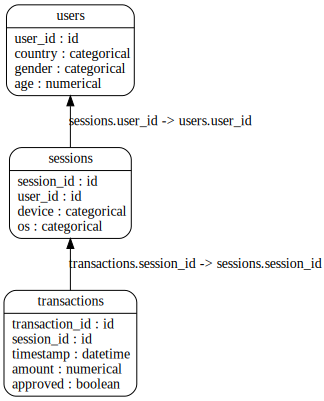

In [14]:
metadata.visualize()

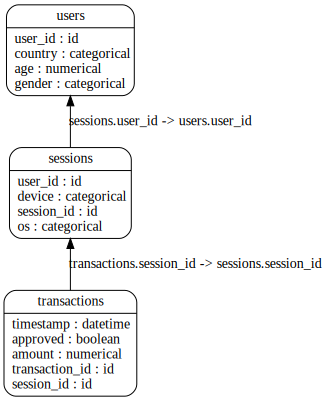

In [15]:
new_meta.visualize()